In [1]:
import pandas as pd

file_path = '/Users/zellazhao/desktop/universal_studio_processed_updated.csv'
data = pd.read_csv(file_path)

data.head()

,Date,crowd_level,crowd_status,User_satisfaction
0,2021-05-30,0.73,Busy,2.0
1,2021-05-30,0.73,Busy,1.0
2,2021-05-30,0.73,Busy,2.0
3,2021-05-29,0.76,Packed,4.0
4,2021-05-28,0.63,Busy,5.0


In [2]:
# Convert 'Date' to datetime and extract day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

# Classify days as 'Weekday' or 'Weekend'
weekend_days = ['Saturday', 'Sunday']
data['DayType'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Group by DayType and calculate mean crowd level
average_crowd_by_day_type = data.groupby('DayType')['crowd_level'].mean()

# Display the result
average_crowd_by_day_type

DayType
Weekday    0.375633
Weekend    0.444997
Name: crowd_level, dtype: float64

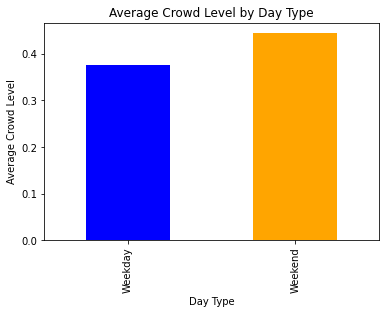

In [3]:
import matplotlib.pyplot as plt

average_crowd_by_day_type = data.groupby('DayType')['crowd_level'].mean()

# Bar plot for average crowd level by DayType
average_crowd_by_day_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Crowd Level by Day Type')
plt.ylabel('Average Crowd Level')
plt.xlabel('Day Type')
plt.show()